In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN

In [3]:
x, y = make_moons(n_samples=300, noise=0.05, random_state=1)
x_scale = StandardScaler().fit_transform(x)

moons = pd.DataFrame(x_scale, columns=["x01", "x02"])
moons["target"] = y
moons

,x01,x02,target
0,-0.238586,-0.865015,1
1,-1.545740,0.613124,0
2,-0.280542,-0.762495,1
3,0.378192,-1.432836,1
4,-1.285611,0.899126,0
...,...,...,...
295,0.041893,-1.270396,1
296,1.250384,-1.187579,1
297,-0.545947,1.566008,0
298,0.781112,-1.365947,1


<Axes: xlabel='x01', ylabel='x02'>

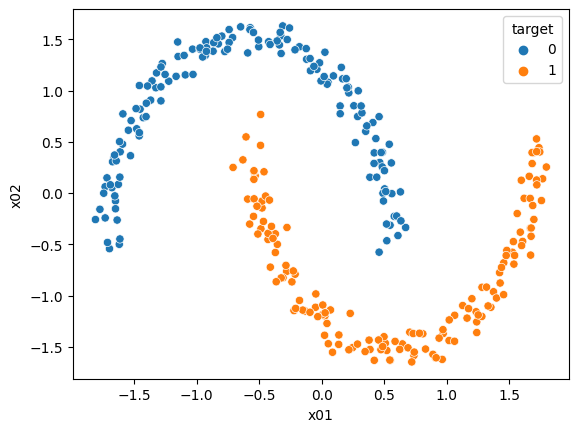

In [5]:
sns.scatterplot(data=moons, x="x01", y="x02", hue="target")

In [6]:
# K-means / agglomerative / mean_shift / dbscan 중에서 뭐가 제일 잘 분류할지

In [7]:
# K-means

model01 = KMeans(n_clusters=2, n_init="auto", random_state=1)
model01.fit(x)
moons["k-means"] = model01.predict(x)

In [8]:
# 병합 군집
model02 = AgglomerativeClustering(n_clusters=2)
moons["agglomerative"] = model02.fit_predict(x)

In [9]:
# mean-shift
from sklearn.cluster import estimate_bandwidth
# estimate_bandwidth : 최적의 대역폭 찾기

In [10]:
bandwidth = round(estimate_bandwidth(x), 2)
model03 = MeanShift(bandwidth=bandwidth)
moons["meanshift"] = model03.fit(x).labels_

In [11]:
# dbscan
model04 = DBSCAN(eps=0.25)
moons["dbscan"] = model04.fit_predict(x)

In [12]:
moons.columns

Index(['x01', 'x02', 'target', 'k-means', 'agglomerative', 'meanshift',
       'dbscan'],
      dtype='object')

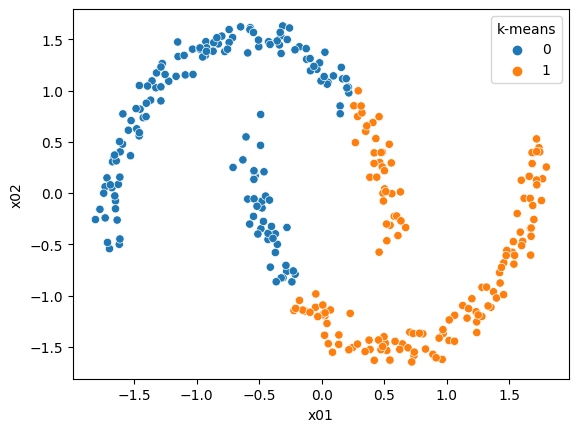

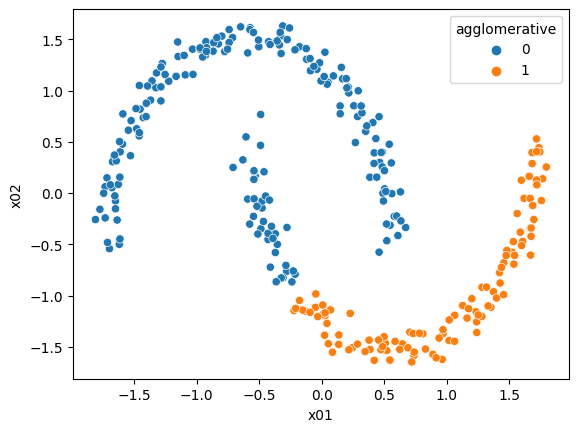

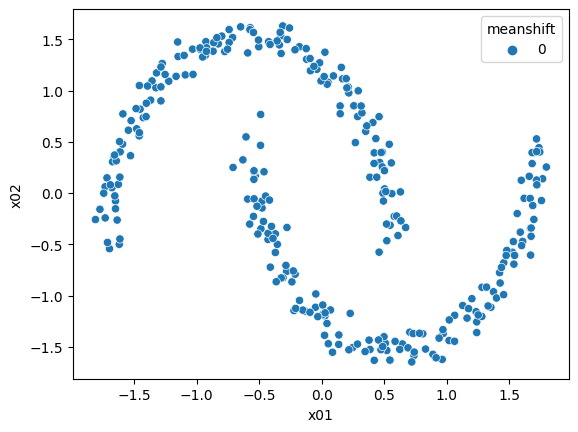

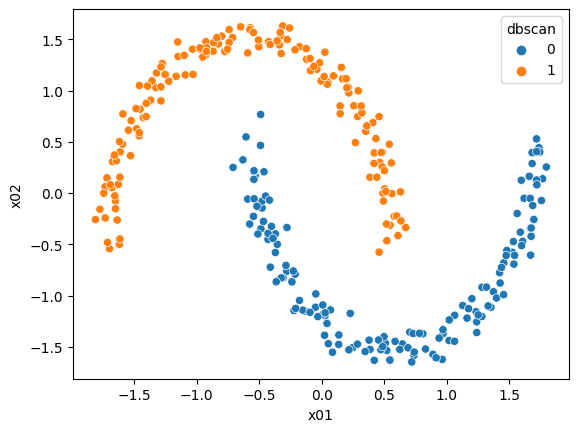

In [14]:
for model in moons.iloc[:, 3:]:
    sns.scatterplot(data=moons, x="x01", y="x02", hue=model)
    plt.show()

In [15]:
# 결과적으로 dbscan이 가장 잘 분류함

In [16]:
# 군집 평가 (한번 해보는 것)

from sklearn.metrics import accuracy_score, normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score

답을 알 때

- ARI (Adjusted Rand Index) : 0(무작위) ~ 1(최적)
- NMI (Mormalized Mutual Information) : 0 (상관 없음) ~ 1(완벽한 상관관계) ->  정규화된 평균값 계산

답을 모를 때

- Silhouette score : 군집의 밀집도 계산

In [17]:
metrics_df = pd.DataFrame(moons.iloc[:, 3:].columns, columns=["model"])
metrics_df

,model
0,k-means
1,agglomerative
2,meanshift
3,dbscan


In [20]:
acc = list()
ari = list()
nmi = list()
silhouette = list()

for predict in moons.iloc[:, 3:]:
    acc.append(accuracy_score(moons["target"], moons[predict]))
    ari.append(adjusted_rand_score(moons["target"], moons[predict]))
    nmi.append(normalized_mutual_info_score(moons["target"], moons[predict]))

    try:
        silhouette.append(silhouette_score(moons[["x01", "x02"]],
                                           moons[[predict]]))
        
    except:
        # 실루엣 계수는 2개 이상으로 클러스터링 되어야 함
        # meanshift가 1개밖에 안 묶여서 에러남!
        silhouette.append(0)

metrics_df["accuracy"] = acc
metrics_df["ari"] = ari
metrics_df["nmi"] = nmi
metrics_df["silhouette"] = silhouette

c:\Users\heeji\anaconda3\envs\dsde04\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\heeji\anaconda3\envs\dsde04\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\heeji\anaconda3\envs\dsde04\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\heeji\anaconda3\envs\dsde04\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [21]:
metrics_df

# 실루엣 계수로 봤을 때 실제 그래프로 확인한 결과와는 다름

,model,accuracy,ari,nmi,silhouette
0,k-means,0.746667,0.240839,0.183534,0.449856
1,agglomerative,0.870000,0.546185,0.550886,0.453029
2,meanshift,0.500000,0.000000,0.000000,0.000000
3,dbscan,0.000000,1.000000,1.000000,0.383867


In [23]:
moons[["target", "dbscan"]]

# 그룹의 이름(라벨링)은 중요하지 않고, 분류를 잘 했는지 아닌지만 중요함
# 군집할 때 accuracy는 볼 필요 없는 이유

,target,dbscan
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
295,1,0
296,1,0
297,0,1
298,1,0
